In [105]:
# Bibek Shiwakoti

In [106]:
"""
Agendas for today: Module 5
various ways to deal with categorical and numerical data in python

-Unsupervised learning : clustering
-how to address the missing values (k nearest neighbor imputer)


"""

"""clusrering : k nearest is low hanging fruit
- DBScan

"""

'clusrering : k nearest is low hanging fruit\n- DBScan\n\n'

In [107]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [108]:
cluster = KMeans(3,random_state=0)

In [109]:
features , original_groups = make_blobs (n_samples =50,
                                        n_features = 2,
                                        centers= 3,
                                        random_state= 1)

In [110]:
cluster.fit(features)

KMeans(n_clusters=3, random_state=0)

In [111]:
type(features)

numpy.ndarray

In [112]:
dataframe = pd.DataFrame(features,columns=['feature_1','feature_2'])

In [113]:
dataframe['group'] = cluster.predict(features)

In [114]:
dataframe['original_group'] = original_groups

In [115]:
dataframe.head()

,feature_1,feature_2,group,original_group
0,-9.877554,-3.336145,2,1
1,-7.287210,-8.353986,0,2
2,-6.943061,-7.023744,0,2
3,-7.440167,-8.791959,0,2
4,-6.641388,-8.075888,0,2


In [116]:
pd.crosstab(dataframe.group,dataframe.original_group)

original_group,0,1,2
group,,,
0,0,0,16
1,17,0,0
2,0,17,0


In [117]:
df =pd.read_csv('./data/Practice_File.csv',usecols=['LotArea','SalePrice'])

In [118]:
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [119]:
df1= df.copy()
import numpy as np

In [120]:
df.drop(['LotArea\t'], inplace=True)

KeyError: "['LotArea\\t'] not found in axis"

In [121]:
#w3schools elbow method

In [122]:
df['LotArea'] = np.log(df['LotArea'])

# Logarithm transformation for column2
df['SalePrice'] = np.log(df['SalePrice'])

In [123]:
df.head()

,LotArea,SalePrice
0,9.041922,12.247694
1,9.169518,12.109011
2,9.328123,12.317167
3,9.164296,11.849398
4,9.565214,12.429216


In [124]:
from matplotlib import pyplot as plt

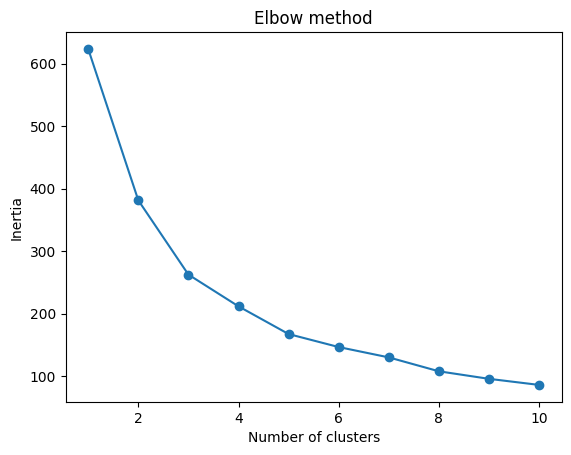

In [125]:
from sklearn.cluster import KMeans

data = list(zip(df.LotArea, df.SalePrice))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [147]:
x= df.LotArea
y=df.SalePrice

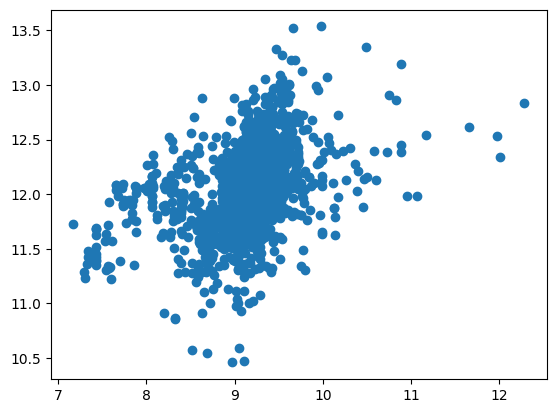

In [148]:
plt.scatter(x, y)
plt.show()




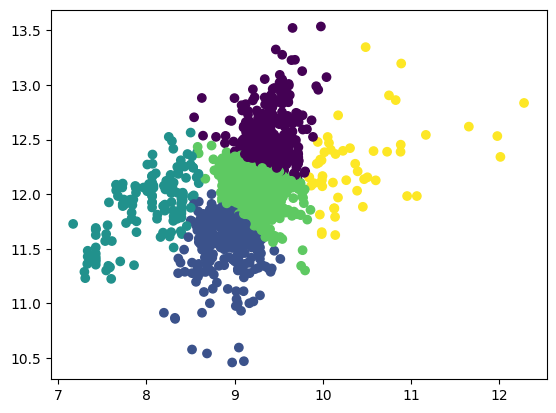

In [149]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21bb2d1a450>,
 'caps': [<matplotlib.lines.Line2D at 0x21bb2d1b4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21bb2d18190>],
 'medians': [<matplotlib.lines.Line2D at 0x21bb2d18750>],
 'fliers': [<matplotlib.lines.Line2D at 0x21bb2ea0d10>],
 'means': []}

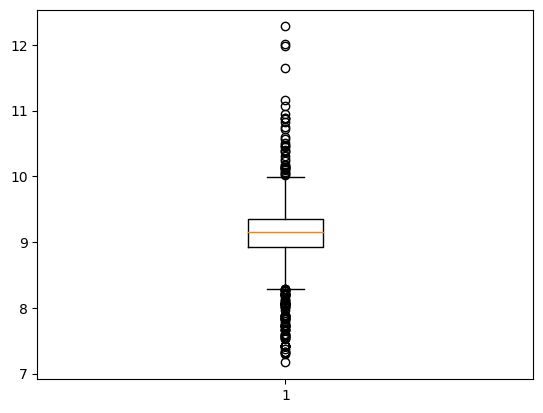

In [150]:
plt.boxplot(x)


{'whiskers': [<matplotlib.lines.Line2D at 0x21baf46aa50>,
 'caps': [<matplotlib.lines.Line2D at 0x21baf4c8850>,
 'boxes': [<matplotlib.lines.Line2D at 0x21baf47a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21baf42c090>],
 'fliers': [<matplotlib.lines.Line2D at 0x21baf457050>],
 'means': []}

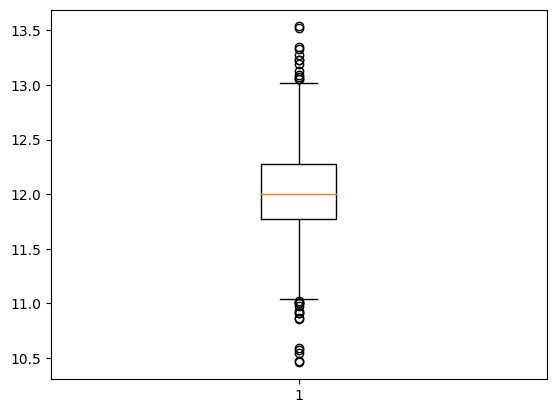

In [130]:
plt.boxplot(y)

In [134]:
df1.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


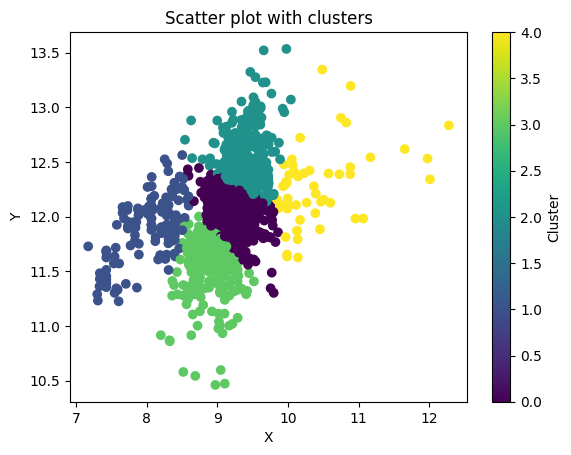

TypeError: only integer scalar arrays can be converted to a scalar index

In [151]:
# plot a boxplot based on each cluster here


## Handling Missing Values

-KNN imputer (this is supervised) IMPPP

In [143]:
import numpy as np
from sklearn.impute import KNNImputer

In [145]:
X = [[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
# try to use knn imputer in the project
# try to compare the output of various algorithms for clustering in the project in some way

In [152]:
# we can use scikit learn imputer module to fill missing values like mean , median or most frequent values

In [154]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])
SimpleImputer()
X = [[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]

In [155]:
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


### Nominal and Ordinal variable

In [156]:
# Creativity there is no rule in data engineering

In [159]:
df = pd.DataFrame({'X':['a','b','a'],'Y':['b','a','c'],'Z':[1,2,3]})
df

,X,Y,Z
0,a,b,1
1,b,a,2
2,a,c,3


In [160]:
pd.get_dummies(df,prefix =['colX','colY'])

,Z,colX_a,colX_b,colY_a,colY_b,colY_c
0,1,True,False,False,True,False
1,2,False,True,True,False,False
2,3,True,False,False,False,True


In [161]:
# RFE recursive feature elementation documentation of scikitleran have a read it

In [164]:
# take and make this using the one hot encoding

In [165]:
df_encoded = pd.get_dummies(df)

print(df_encoded)

   Z    X_a    X_b    Y_a    Y_b    Y_c
0  1   True  False  False   True  False
1  2  False   True   True  False  False
2  3   True  False  False  False   True


In [168]:

from sklearn.preprocessing import OneHotEncoder

# Create the DataFrame
df = pd.DataFrame({'X':['a','b','a'],'Y':['b','a','c'],'Z':[1,2,3]})

# One-hot encoding for categorical columns
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[['X', 'Y']]).toarray())  # Convert to dense array
df_encoded.columns = encoder.get_feature_names_out(['X', 'Y'])  # Assign meaningful column names
df_encoded = pd.concat([df_encoded, df[['Z']]], axis=1)  # Concatenate with the original 'Z' column

print(df_encoded)


   X_a  X_b  Y_a  Y_b  Y_c  Z
0  1.0  0.0  0.0  1.0  0.0  1
1  0.0  1.0  1.0  0.0  0.0  2
2  1.0  0.0  0.0  0.0  1.0  3
